In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("Methane_final.csv")
df.head(5)

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1548 non-null   int64  
 1   region      1548 non-null   object 
 2   country     1548 non-null   object 
 3   emissions   1548 non-null   float64
 4   type        1548 non-null   object 
 5   segment     1548 non-null   object 
 6   reason      1548 non-null   object 
 7   baseYear    1548 non-null   object 
 8   notes       1548 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 109.0+ KB


In [4]:
df=df.drop(["Unnamed: 0"],axis=1)

In [5]:
df.isnull().sum()

region       0
country      0
emissions    0
type         0
segment      0
reason       0
baseYear     0
notes        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     1548 non-null   object 
 1   country    1548 non-null   object 
 2   emissions  1548 non-null   float64
 3   type       1548 non-null   object 
 4   segment    1548 non-null   object 
 5   reason     1548 non-null   object 
 6   baseYear   1548 non-null   object 
 7   notes      1548 non-null   object 
dtypes: float64(1), object(7)
memory usage: 96.9+ KB


In [7]:
df['emissions']=df['emissions'].astype(int)

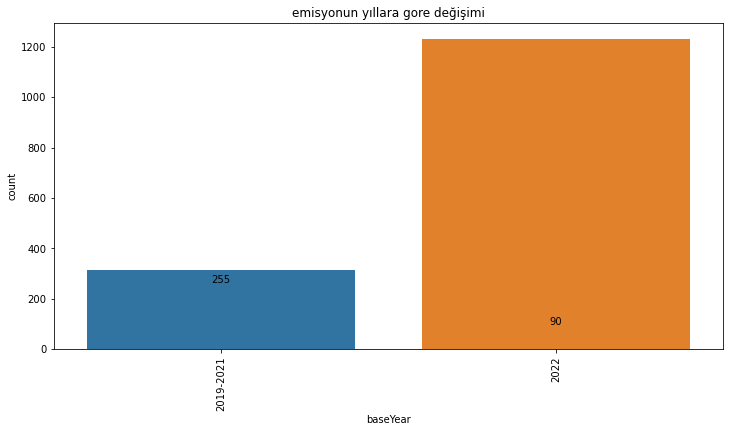

In [8]:
plt.figure(figsize=(12,6))
plt.title("emisyonun yıllara gore değişimi")
sns.countplot(x=df["emissions"]);
ax=sns.countplot(x=df["baseYear"])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90);

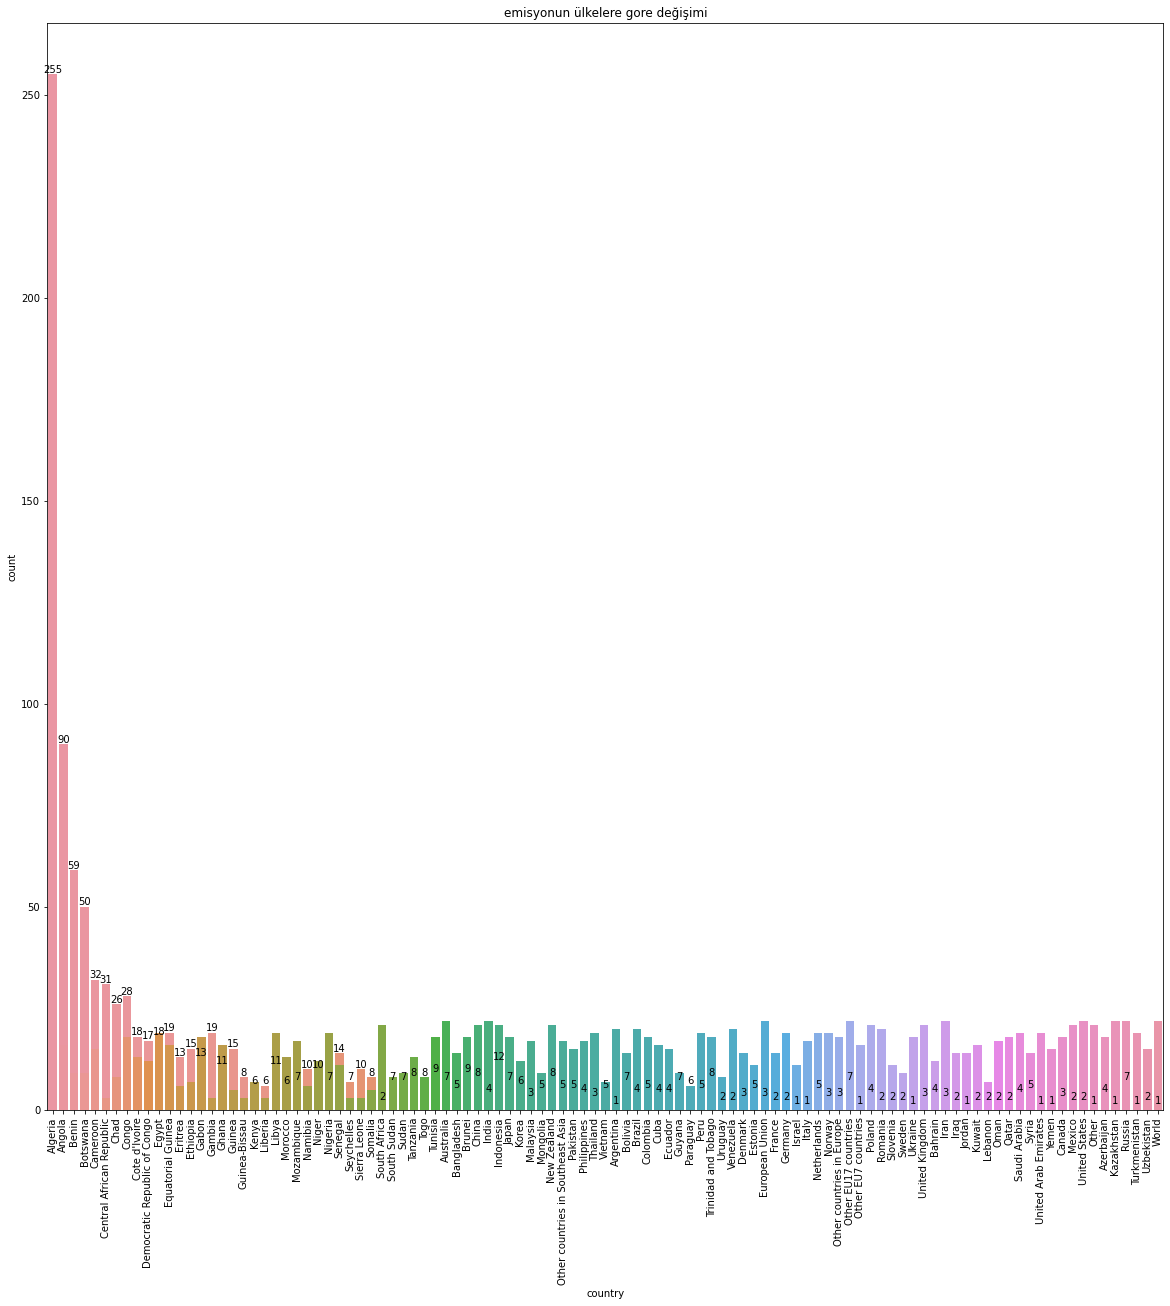

In [9]:
plt.figure(figsize=(20,20))
plt.title("emisyonun ülkelere gore değişimi")
sns.countplot(x=df["emissions"]);
ax=sns.countplot(x=df["country"])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90);

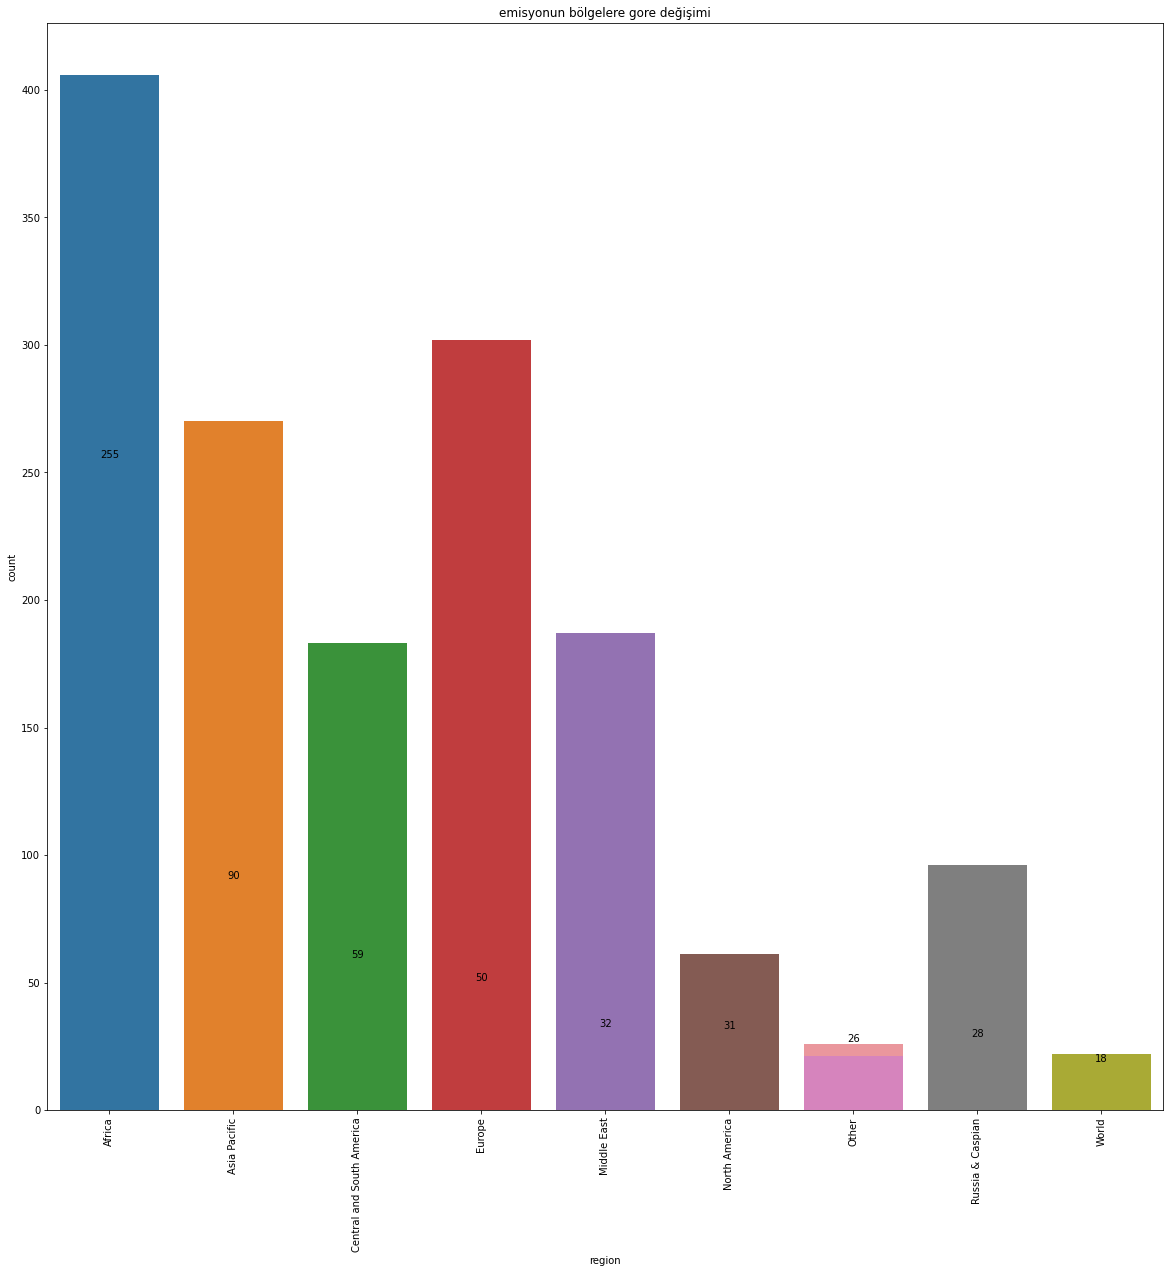

In [10]:
plt.figure(figsize=(20,20))
plt.title("emisyonun bölgelere gore değişimi")
sns.countplot(x=df["emissions"]);
ax=sns.countplot(x=df["region"])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90);

In [11]:
df['type'].unique()

array(['Agriculture', 'Energy', 'Other', 'Waste'], dtype=object)

In [19]:
df['country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Cameroon',
       'Central African Republic', 'Chad', 'Congo', "Cote d'Ivoire",
       'Democratic Republic of Congo', 'Egypt', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Liberia', 'Libya', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Senegal',
       'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Australia',
       'Bangladesh', 'Brunei', 'China', 'India', 'Indonesia', 'Japan',
       'Korea', 'Malaysia', 'Mongolia', 'New Zealand',
       'Other countries in Southeast Asia', 'Pakistan', 'Philippines',
       'Thailand', 'Vietnam', 'Argentina', 'Bolivia', 'Brazil',
       'Colombia', 'Cuba', 'Ecuador', 'Guyana', 'Paraguay', 'Peru',
       'Trinidad and Tobago', 'Uruguay', 'Venezuela', 'Denmark',
       'Estonia', 'European Union', 'France', 'Germany', 'Israel',
      

In [12]:
df['segment'].unique()

array(['Total', 'Bioenergy', 'Gas pipelines and LNG facilities',
       'Onshore gas', 'Onshore oil', 'Other from coal',
       'Other from oil and gas',
       'Satellite-detected large oil and gas emissions', 'Offshore oil',
       'Offshore gas', 'Coking coal', 'Steam coal'], dtype=object)

In [13]:
df['reason'].unique()

array(['All', 'Fugitive', 'Vented', 'Flared'], dtype=object)

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [26]:
x=df[["emissions"]]

In [27]:
model=KMeans(n_clusters=4)

In [28]:
model=model.fit(x)

In [29]:
tahmin=model.predict(x)

In [30]:
tahmin

array([0, 0, 0, ..., 1, 2, 3])

In [31]:
x["cluster"]=tahmin

In [32]:
silhouette_score(x,tahmin)

0.9624466180476067

In [33]:
allscore=[]
allclusters=[]
uzaklıklar=[]
def clust(kactane):
    
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklık=model.inertia_
        print(" Cluster ",i," score ",score)
        allscore.append(score)
        allclusters.append(i)
        uzaklıklar.append(uzaklık)
clust(10)

 Cluster  2  score  0.9921971039047958
 Cluster  3  score  0.9728834790214399
 Cluster  4  score  0.9624466180476067
 Cluster  5  score  0.9265844221565362
 Cluster  6  score  0.9034204064212016
 Cluster  7  score  0.8792601173008414
 Cluster  8  score  0.8631609511459652
 Cluster  9  score  0.8471744771309995
 Cluster  10  score  0.8460493368320849
 Cluster  11  score  0.8473857719814891


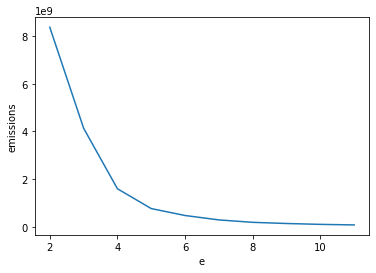

In [34]:
plt.xlabel("e")
plt.ylabel("emissions")
plt.plot(allclusters,uzaklıklar)